# Analyzing Shopping Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read CSV file
df = pd.read_csv('customer_shopping_data.csv')
df.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
# get dimensions of dataframe
df.shape

(99457, 10)

In [4]:
# get information about dataset like datatype and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


### Data Cleaning and Analysis

In [5]:
# check for number of missing values in each column
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [6]:
# check for duplicated columns
df.duplicated().sum()

0

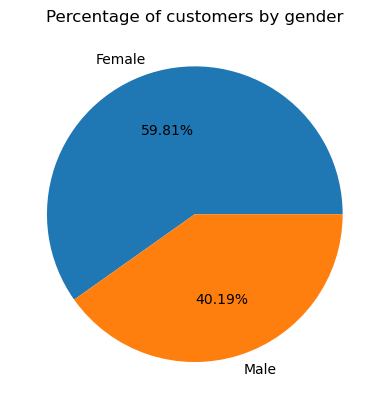

In [7]:
# calculate percentage of customers by gender
gender = df['gender'].value_counts()

fig, ax = plt.subplots()
ax.pie(gender, labels = gender.index, autopct = '%1.2f%%')
ax.set_title('Percentage of customers by gender')
plt.show()

In [8]:
# create new column of sales for each transaction 
df['sales'] = df['quantity'] * df['price'] 
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


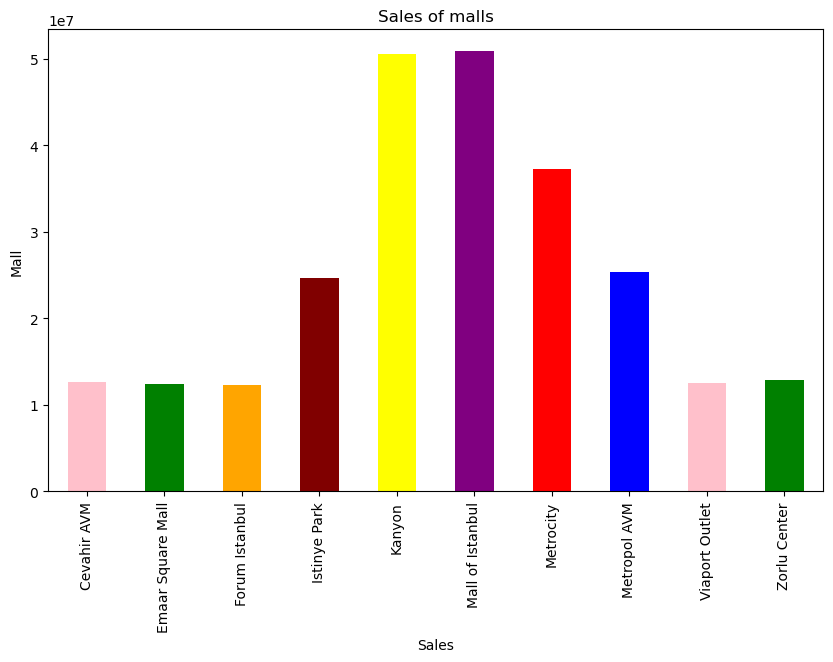

In [9]:
# check for sales of malls
colors = ['pink', 'green', 'orange', 'maroon', 'yellow','purple' ,'red', 'blue']
sales_mall = df.groupby('shopping_mall')['sales'].sum()
sales_mall.plot(kind = 'bar', figsize = (10, 6), color = colors)

plt.title('Sales of malls')
plt.xlabel('Sales')
plt.ylabel('Mall')
plt.show()

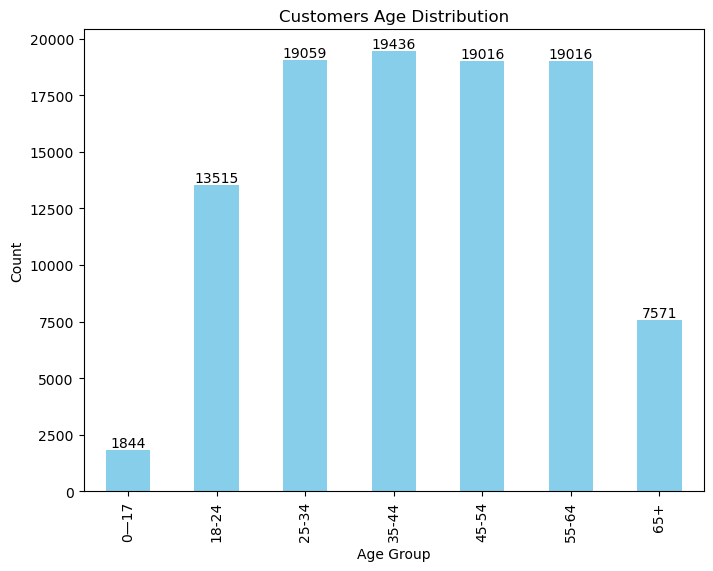

In [10]:
# create age groups with corresponding age groups
age_groups = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0—17','18-24','25-34','35-44','45-54','55-64','65+']

# use pandas cut function to create a new column with age group labels
df['age_group'] = pd.cut(df['age'], bins = age_groups, labels = labels)

# create a bar chart for age distribution
fig, ax = plt.subplots(figsize = (8, 6)) 
df['age_group'].value_counts().sort_index().plot(kind ='bar', color = 'skyblue', ax = ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Customers Age Distribution')

for i in ax.containers: # To add labels
    ax.bar_label(i)
plt.show()

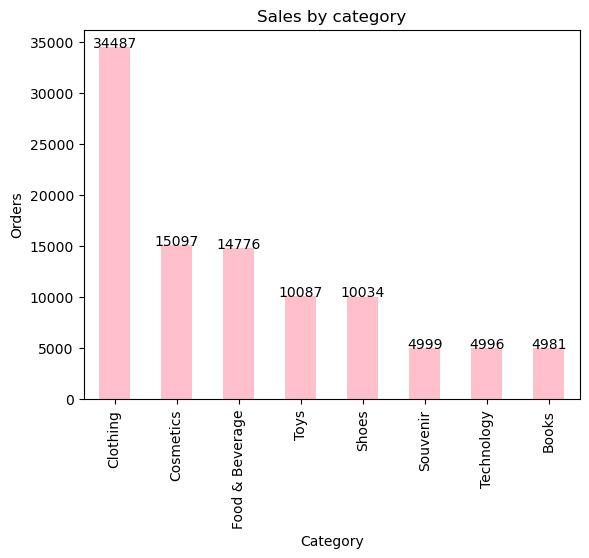

In [11]:
# calculate sales by catergory
category_sales = df['category'].value_counts()

# create a bar chart of sales by category
category_sales.plot(kind ='bar', color = 'pink')
plt.xlabel('Category')
plt.ylabel('Orders')
plt.title('Sales by category')
    
for i, count in enumerate(category_sales): # add labels to each bar
    plt.text(i, count+10, str(count), ha = 'center')
plt.show()

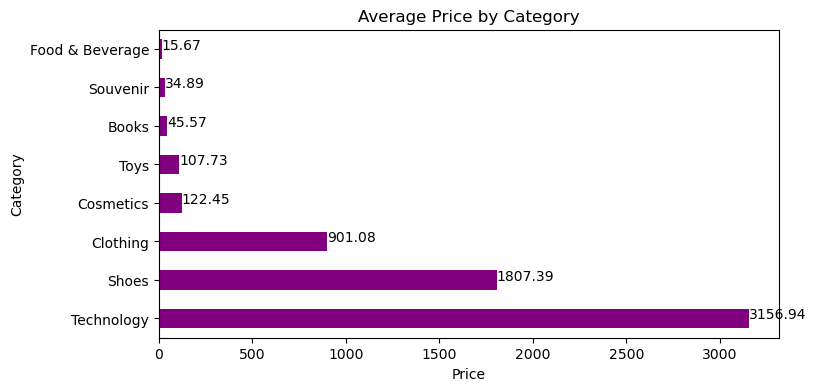

In [12]:
# calculate the average price for each␣category
category_avg = df.groupby('category')['price'].mean().sort_values(ascending = False)

# create horizontal bar chart for average prices
plt.figure(figsize = (8,4))
category_avg.plot(kind = 'barh', color = 'purple')
plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Average Price by Category')

for i, mean in enumerate(category_avg): # add labels to the bars
    plt.text(mean+0.1, i, str(round(mean, 2)), fontsize=10)
plt.show()

In [13]:
# find corelations between data
df.corr()

,age,quantity,price,sales
age,1.000000,0.000667,0.001694,0.002731
quantity,0.000667,1.000000,0.344880,0.461173
price,0.001694,0.344880,1.000000,0.962372
sales,0.002731,0.461173,0.962372,1.000000


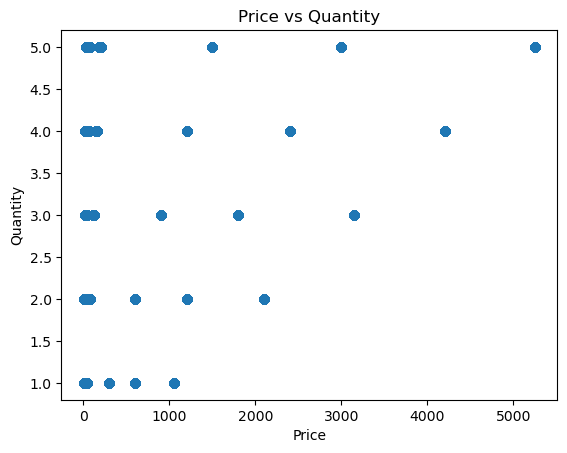

In [14]:
# create a scatter plot to find relationship between price and quantity
plt.scatter(x = 'price', y = 'quantity', data = df)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity')
plt.show()

In [15]:
# changing datatype of date
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst = True)

df['year'] = df['invoice_date'].dt.strftime("%Y")
df['month'] = df['invoice_date'].dt.strftime("%m")
df['day'] = df['invoice_date'].dt.strftime("%d")
df['weekday'] = df['invoice_date'].dt.weekday

In [16]:
# define a dictionary that maps integers representing days of the week to their corresponding names
dw_mapping = {
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

# create a new column dayofweek
df['dayofweek'] = df['invoice_date'].dt.weekday.map(dw_mapping)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,age_group,year,month,day,weekday,dayofweek
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,25-34,2022,08,05,4,Friday
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,18-24,2021,12,12,6,Sunday
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,18-24,2021,11,09,1,Tuesday
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,65+,2021,05,16,6,Sunday
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,45-54,2021,10,24,6,Sunday


<AxesSubplot:title={'center':'Days with their sales'}, xlabel='Day', ylabel='Number of Sales'>

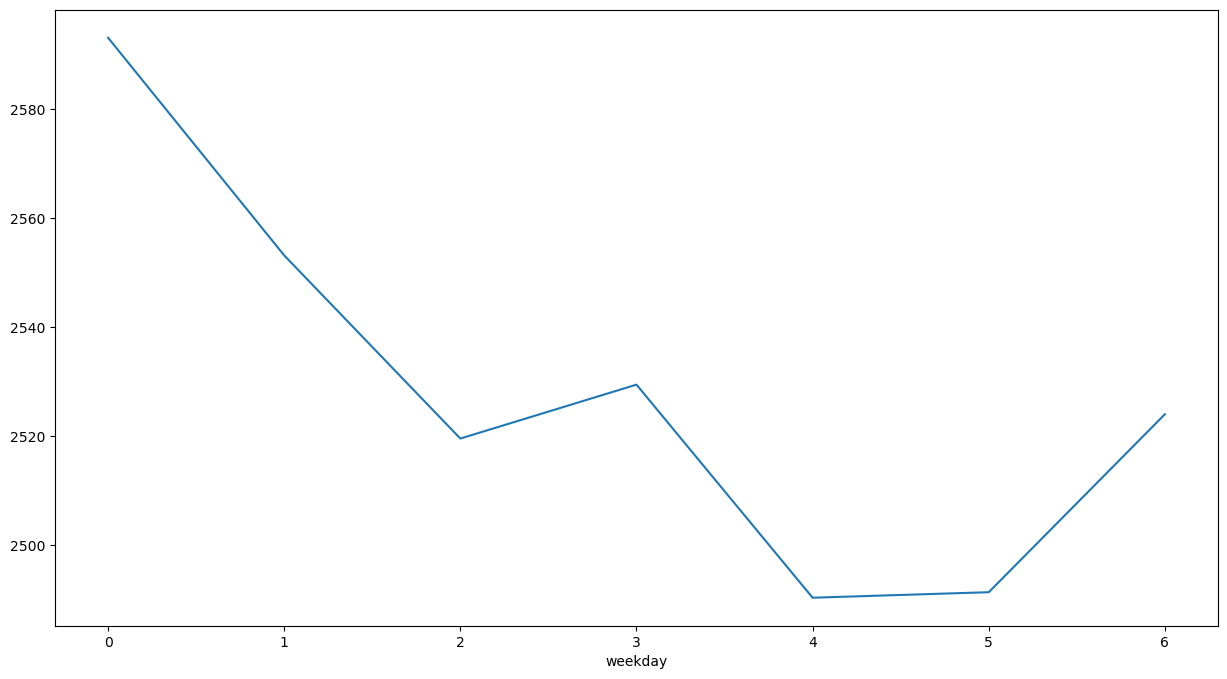

In [17]:
# calculating sales for the days in week
avg_sales_by_day = df.groupby('weekday')['sales'].mean() # Group data by weekday and calculate the mean sales for each group

# create a line plot of mean sales for each day of week
avg_sales_by_day.plot(kind = 'line', figsize = (15,8), alpha = 1.0)
ax.set_title('Days with their sales')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Sales')
ax

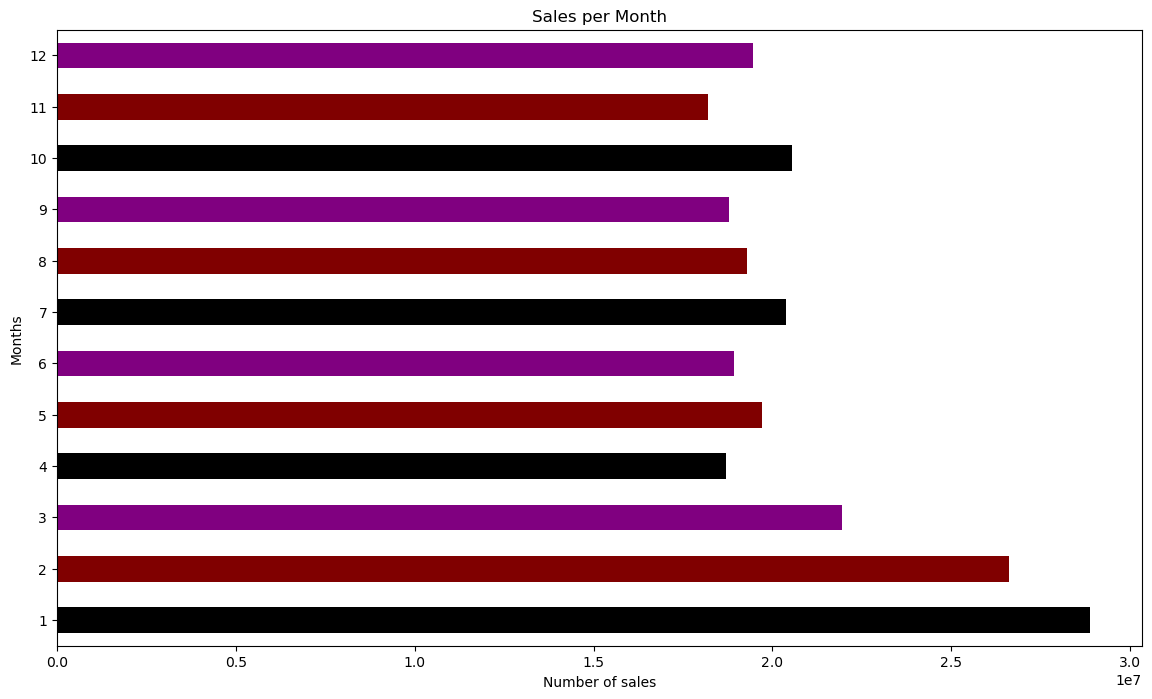

In [18]:
# Sales according to months
most_sales = df.groupby('month',axis = 0).sum()
most_sales['sales'].index = most_sales.index.map(int) #convert the index to integers using map() method

# create a horizontal bar plot of the total sales for each month
colors = ['k', 'maroon', 'purple']
most_sales['sales'].plot(kind = 'barh', figsize = (14, 8), color = colors) 
plt.title('Sales per Month')
plt.xlabel('Number of sales')
plt.ylabel('Months')
plt.show()

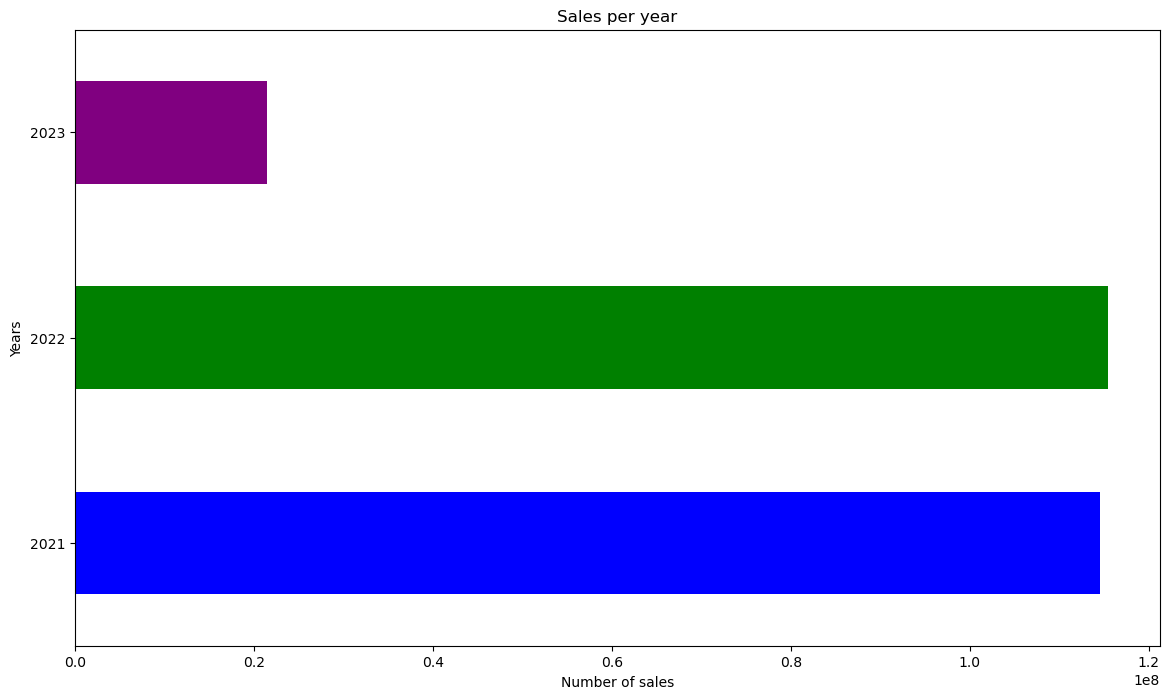

In [19]:
# Sales according to years
most_sales = df.groupby('year',axis = 0).sum()
most_sales['sales'].index = most_sales.index.map(int) #convert the index to integers using map() method

# create a horizontal bar plot of the total sales for each year
colors = ['blue', 'green', 'purple']
most_sales['sales'].plot(kind = 'barh', figsize = (14, 8), color = colors) 
plt.title('Sales per year')
plt.xlabel('Number of sales')
plt.ylabel('Years')
plt.show()

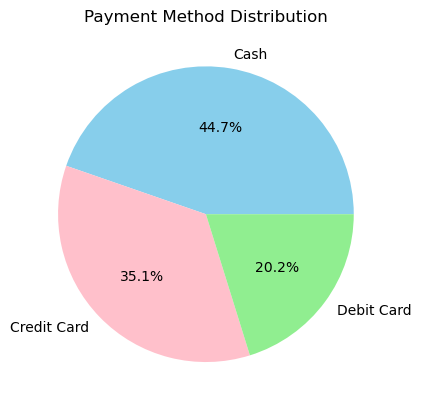

In [20]:
# calculate percentage of payment menthods
payment = df['payment_method'].value_counts()

# create a pie chart
fig, ax = plt.subplots()
colors = ['skyblue', 'pink', 'lightgreen']
ax.pie(payment, labels = payment.index, colors = colors, autopct = '%1.1f%%')
ax.set_title('Payment Method Distribution')
plt.show()

Text(0, 0.5, 'Amount')

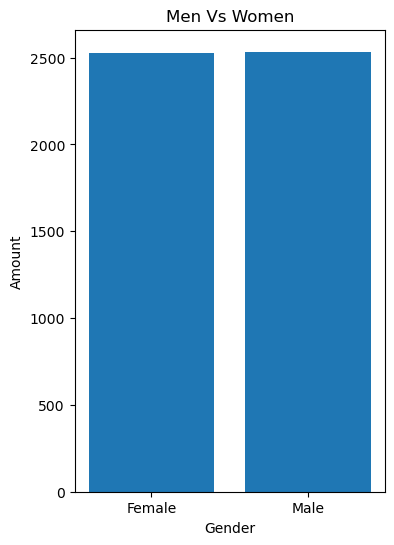

In [21]:
# find highest spender between men and women
df_spent = df.groupby('gender')['sales'].mean().reset_index()
df_spent = df_spent.sort_values(by = 'sales')

fig, ax = plt.subplots(figsize = (4,6))
ax.bar(df_spent['gender'], df_spent['sales'])
ax.set_title('Men Vs Women')
ax.set_xlabel('Gender')
ax.set_ylabel('Amount')